Project github: https://github.com/ArshandaGN/projectUtsPrakMLw6.git

# Import Library

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc

# Input Dataset

In [84]:
data_dir = 'C:/Tugas Kuliah/Mini-Project-kyun/Project-chan 2 (Image)/dataset/dataset/'

# EDA

In [85]:
train_dataset = image_dataset_from_directory(
    data_dir,
    image_size=(128, 128),   # resize semua gambar ke 128x128
    batch_size=32,
    label_mode='binary'
)

Found 4277 files belonging to 2 classes.


In [86]:
class_names = train_dataset.class_names
print("Kelas yang terdeteksi:", class_names)

Kelas yang terdeteksi: ['anemic', 'nonanemic']


In [87]:
def mengambil_gambar(folder_path, label):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.png'):
            img_path = os.path.join(folder_path, filename)
            img = Image.open(img_path).resize((128, 128))
            img_array = np.array(img) / 255.0  # Normalisasi
            images.append(img_array)  # rata jadi 1D
            labels.append(label)
    return images, labels

In [88]:
anemic_folder = os.path.join(data_dir, 'anemic')
nonanemic_folder = os.path.join(data_dir, 'nonanemic')

X_anemic, y_anemic = mengambil_gambar(anemic_folder, 1)
X_nonanemic, y_nonanemic = mengambil_gambar(nonanemic_folder, 0)

# Gabungkan
X = np.array(X_anemic + X_nonanemic)
y = np.array(y_anemic + y_nonanemic)

In [89]:
X

array([[[[0.5254902 , 0.21568627, 0.22745098, 0.30588235],
         [0.55686275, 0.24705882, 0.25098039, 0.77254902],
         [0.56862745, 0.2627451 , 0.28235294, 0.67843137],
         ...,
         [0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        ]],

        [[0.52941176, 0.23529412, 0.23529412, 0.06666667],
         [0.53333333, 0.24313725, 0.24313725, 0.43137255],
         [0.56470588, 0.2627451 , 0.2745098 , 0.93333333],
         ...,
         [0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        ],
         [0.54901961, 0.25490196, 0.2745098 , 0.2       ],
         ...,
         [0.        , 0.        , 0.        , 0.        ],
         [

In [90]:
print(f"Jumlah gambar: {len(X)}")
print(f"Jumlah gambar anemia: {sum(y == 1)}")
print(f"Jumlah gambar nonanemia: {sum(y == 0)}")
print(f"Label: {np.unique(y, return_counts=True)}")

Jumlah gambar: 4277
Jumlah gambar anemia: 2563
Jumlah gambar nonanemia: 1714
Label: (array([0, 1]), array([1714, 2563]))


In [93]:
gambar_rusak = []
for folder in [anemic_folder, nonanemic_folder]:
    for filename in os.listdir(folder):
        if filename.endswith('.png'):
            try:
                img_path = os.path.join(folder, filename)
                img = Image.open(img_path)  # Cek apakah gambar dapat dibuka
                img.verify()  # Verifikasi gambar
            except (IOError, SyntaxError):
                gambar_rusak.append(filename)

print(f"Gambar rusak: {gambar_rusak}")

Gambar rusak: []


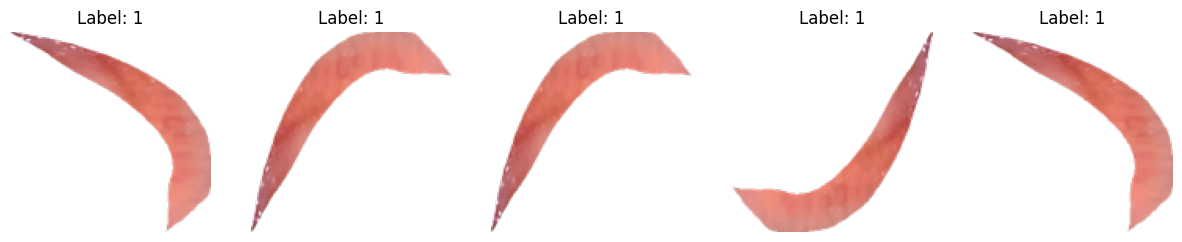

In [91]:
fig, axes = plt.subplots(1, 5, figsize=(15, 15))
for i in range(5):
    axes[i].imshow(X[i])
    axes[i].axis('off')
    axes[i].set_title(f"Label: {y[i]}")
plt.show()

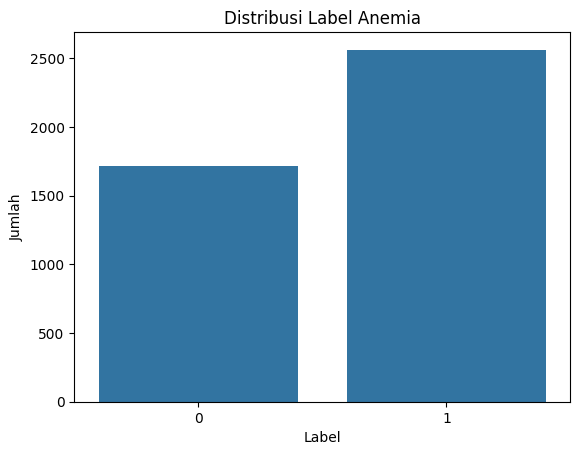

In [92]:
sns.countplot(x=y)
plt.title("Distribusi Label Anemia")
plt.xlabel("Label")
plt.ylabel("Jumlah")
plt.show()

# Preprocessing

Transformasi Gambar

In [94]:
X_flattened = X.reshape(X.shape[0], -1)
X_flattened

array([[0.5254902 , 0.21568627, 0.22745098, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.58431373, 0.54117647,
        1.        ],
       [0.83921569, 0.58431373, 0.54117647, ..., 0.        , 0.        ,
        0.        ]])

Normalisasi Gambar

In [95]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_flattened)
X_scaled

array([[ 1.90453951,  0.97156163,  1.17402242, ..., -0.50326964,
        -0.49515786, -0.45715673],
       [-0.40485457, -0.38835756, -0.38323435, ..., -0.50326964,
        -0.49515786, -0.45715673],
       [-0.40485457, -0.38835756, -0.38323435, ..., -0.50326964,
        -0.49515786, -0.45715673],
       ...,
       [-0.40485457, -0.38835756, -0.38323435, ..., -0.50326964,
        -0.49515786, -0.45715673],
       [-0.40485457, -0.38835756, -0.38323435, ...,  2.57954051,
         2.61503021,  3.10319126],
       [ 3.28328225,  3.29578715,  3.32196279, ..., -0.50326964,
        -0.49515786, -0.45715673]])

Split Data

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
print(f"Shape data latih: {X_train.shape}")
print(f"Shape data uji: {X_test.shape}")

Shape data latih: (3421, 65536)
Shape data uji: (856, 65536)


# Pemilihan Model & Training

Pemodelan (Decision Tree)

In [ ]:
dt_model = DecisionTreeClassifier(criterion="gini", max_depth=20)
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)

# Evaluasi Model

Akurasi dan classification report

In [ ]:
print(f"Decision Tree - Akurasi: {accuracy_score(y_test, dt_y_pred):.2f}")
print("Decision Tree - Classification Report:")
print(classification_report(y_test, dt_y_pred))

Decision Tree - Akurasi: 0.89
Decision Tree - Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       321
           1       0.91      0.90      0.91       535

    accuracy                           0.89       856
   macro avg       0.88      0.88      0.88       856
weighted avg       0.89      0.89      0.89       856



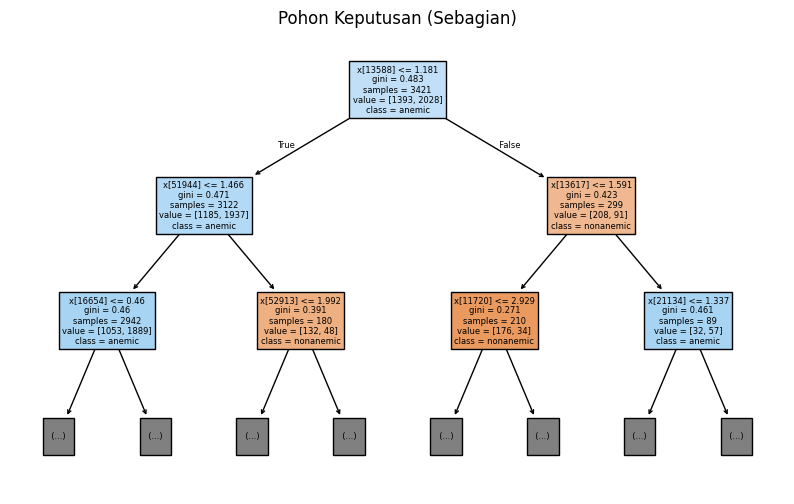

In [99]:
plt.figure(figsize=(10, 6))
plot_tree(dt_model, filled=True, max_depth=2, class_names=['nonanemic', 'anemic'])
plt.title("Pohon Keputusan (Sebagian)")
plt.show()


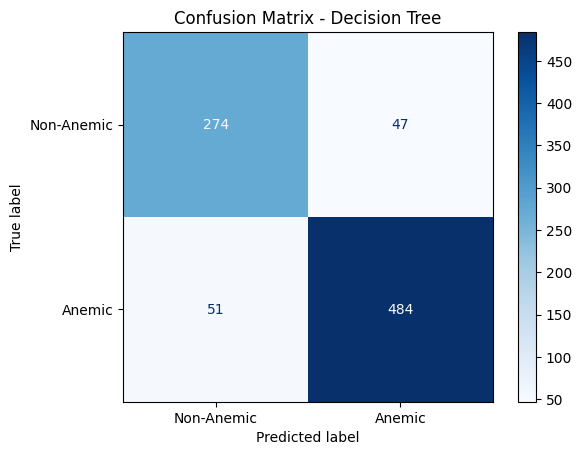

In [100]:
cm = confusion_matrix(y_test, dt_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Anemic', 'Anemic'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Decision Tree")
plt.show()


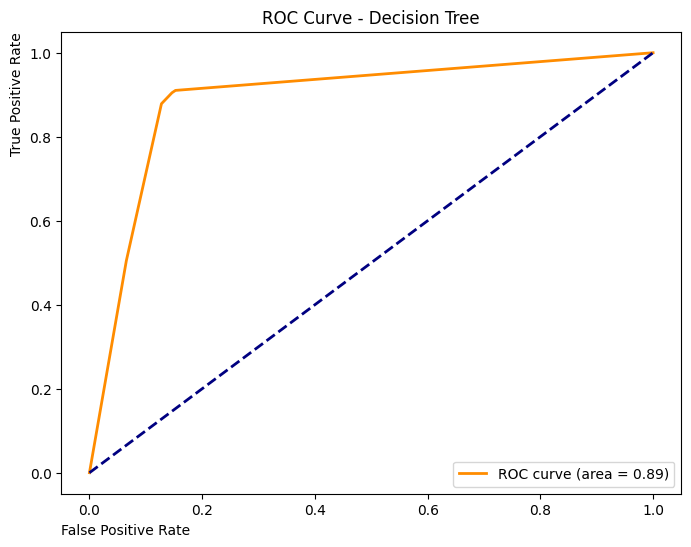

In [101]:
fpr, tpr, thresholds = roc_curve(y_test, dt_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate', loc='left')
plt.ylabel('True Positive Rate', loc='top')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc='lower right')
plt.grid(False)
plt.show()
